## Load data

First, we load up a DataFrame.

In [1]:
# To keep the page organized do all imports here
import pandas as pd
import seaborn as sns 
sns.set()

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

Let's read the student performance file as an example for data visualization.

In [2]:
students_df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/studentsperformance.csv")

Looking into the first 5 rows

In [3]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Getting some information about the student data

In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Before you go on, explore this dataset using the techniques from the previous checkpoint so you understand the basic data schema.

## Understanding distribution with Histograms

The histogram can help us quickly analyze a variable's distribution. Let's only focus on math, reading, and writing scores and see how they are distributed in student performance data.  

In [5]:
students_df[['math score', 'writing score', 'reading score']].describe()

,math score,writing score,reading score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,68.054000,69.169000
std,15.16308,15.195657,14.600192
min,0.00000,10.000000,17.000000
25%,57.00000,57.750000,59.000000
50%,66.00000,69.000000,70.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


We can see that math has a mean of 66. Let's do a histogram to visualize this data.

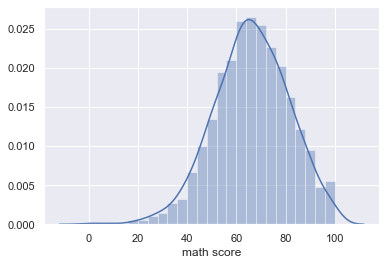

In [6]:
ax = sns.distplot(students_df['math score'])

Seaborn gave us a lot out of the box. The name of the Series was used to create a label for the x-axis. A kernel density estimate was plotted along with the histogram. And the number of bins was estimated automatically using a built in formula. But, we have control over these things if we wish.

`distplot` makes a good guess at the right number of bins to use, but increasing or decreasing the number may reveal features of the data. It may be instructive to experiment by plotting the histogram with a different number of bins.  We could draw a histogram for reading score using 20 bins for instance.

We can also change the number of bins to 10, 30, or 50 and we will get a slightly different distribution depending on the number of bins we decided to use.

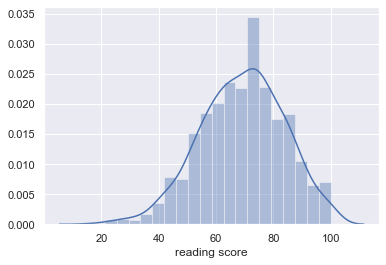

In [7]:
ax = sns.distplot(students_df['reading score'], bins=20)

Using 10 bins:

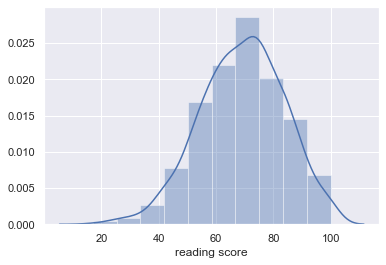

In [8]:
ax = sns.distplot(students_df['reading score'], bins=10)

Using 50 bins:

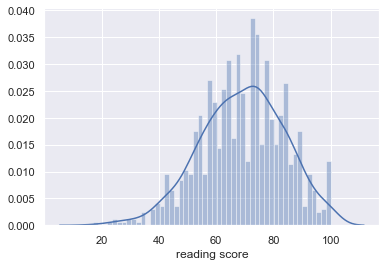

In [9]:
ax = sns.distplot(students_df['reading score'], bins=50)

We can also remove the kde(kernel density estimation).  That way, we can see how the distribution of the data looks like without normalization. 

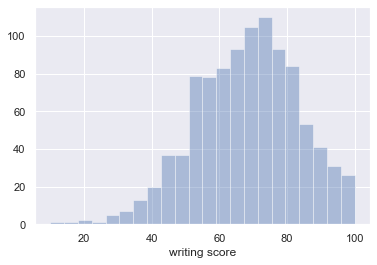

In [10]:
ax = sns.distplot(students_df['writing score'], kde=False)

## Comparing the distribution of two variables

Next, let's visualize the relationship between two variables. Here, what we want is a scatter plot, and for that we'll use  the `scatterplot()` function.  Let's compare math and reading scores:

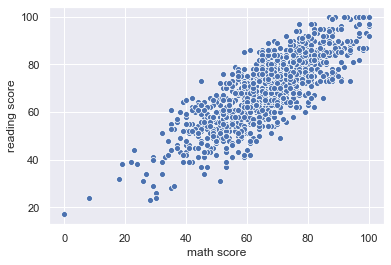

In [11]:
sns.scatterplot(x="math score", y="reading score", data=students_df);

In a scatter plot, one variable is plotted on the x-axis and the other on the y-axis. It may be immediately obvious that as the math score increases, the reading score also increases. One explanation here might be that students who are good at math are also better at reading, or vice-versa. Or, we might think that what's really at stake is that schools that have high reading scores also tend to have high writing scores, because they have sufficient resources.

Suppose we wanted to see how this distribution works across a gender variable? We can group the data by gender and generate a scatter plot by telling Seaborn which categorical column to use.

We can add the "gender" in the `hue` parameter to specify that.

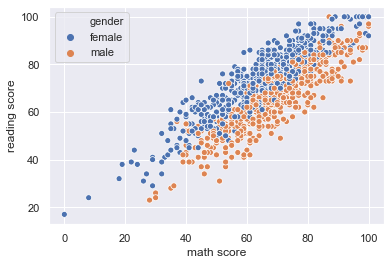

In [12]:
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df);

It looks like females are scoring higher in reading than the males. We will further explore this another type of plot shortly.

Does the type of lunch have any effect on the score? It is possible to vary the type of markers as well as the colors used to show grouping by two different variables.

We can add "lunch" in the `style` parameter to show the difference between standard and free/reduced.

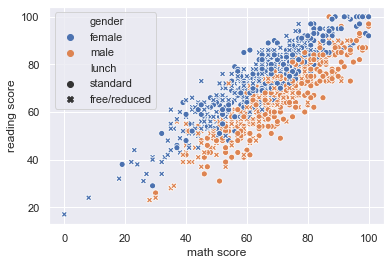

In [13]:
sns.scatterplot(x="math score", y="reading score", hue="gender", style="lunch",  data=students_df );

We could even vary the size of the markers to show another variable. Does completion of the preparation course matter?

We can add "test preparation course" in the `size` parameter to show the difference by the size of the data marker.

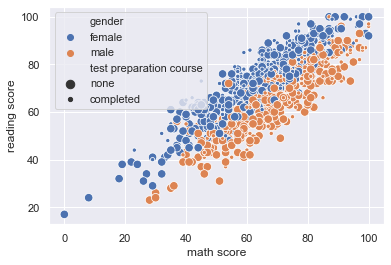

In [14]:
sns.scatterplot(x="math score", y="reading score", hue="gender", size="test preparation course",  data=students_df);

It's possible to combine the histogram and the scatterplot to see both the individual distributions as well as the relative distributions on the same graph.

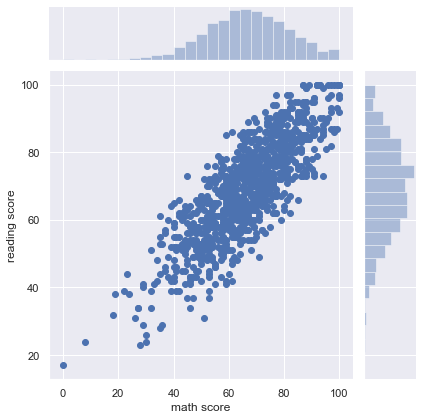

In [15]:
sns.jointplot(x="math score", y="reading score", data=students_df);

To plot multiple distributions in the dataset, use the `pairplot()` function. It will compare all variables against each other in a matrix of plots.

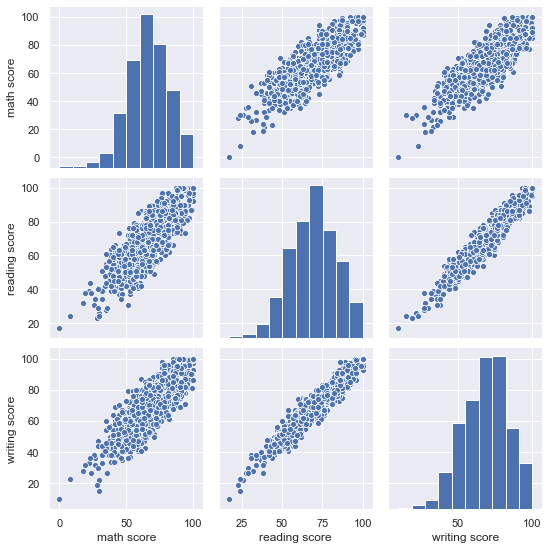

In [16]:
sns.pairplot(students_df);

We can see strong correlations between the three scores.

Next, let's examine distributions with respect to categories. In the scatter plots above, as we added categorical variables, the plots became progressively harder to interpret. Instead, we could use a **Box Plot** to compare these variables by category.

## Box Plots

Box plots visually illustrate the distribution of values in a category. In a box plot, the median and upper and lower quartiles are clearly shown as well as the maximum and minimum. Two or more samples may be compared using the boxplot.

![](assets/python4_visualizations_01-v2.png)

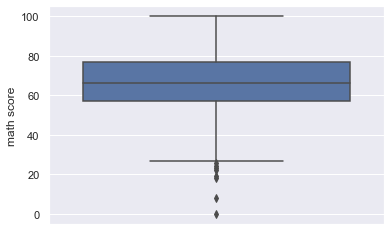

In [17]:
sns.boxplot(y="math score", data=students_df);

How are math scores distributed across genders?

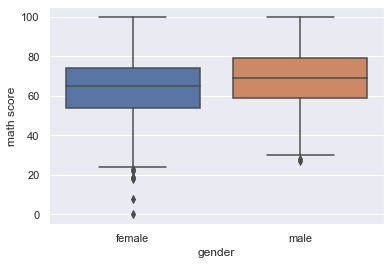

In [18]:
sns.boxplot(y="math score", x="gender", data=students_df);

How are math scores affected by parents education and gender? To properly display the labels on the x axis we will have to rotate them.

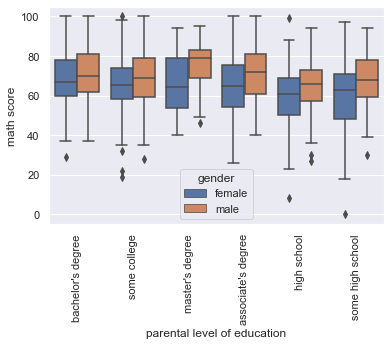

In [27]:
ax = sns.boxplot(y="math score", hue="gender", x = "parental level of education", data=students_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

With the box plot, it's easier to compare the medians of the various categories, and the range of values. There doesn't seem to be any significant difference in parental level of education. Maybe the preparation course makes a difference? Let's look at that variable. If you want to see the gender, lunch, and test preparation course variables in one plot, then a `catplot` might be a good choice.

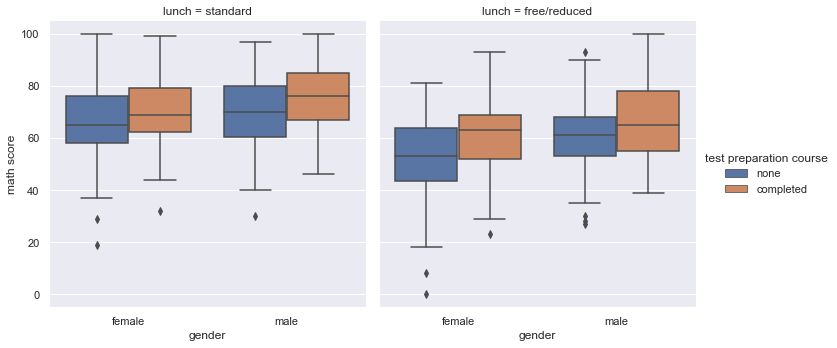

In [20]:
sns.catplot(y="math score", x="gender", hue = "test preparation course", col="lunch",
            kind="box", data=students_df);

Now we get some interesting results. Clearly the students that completed the test preparation course scored higher than those that did not. There also seems to be a small advantage to the group with standard lunch over the group with reduced lunch.

# Custom plots in `seaborn`

Like with [Excel](https://courses.thinkful.com/dabc-excel-foundations-3-v1/checkpoint/3), `seaborn` includes many options for customizing a chart. Let's look at the most common using our earlier grouped scatter plot as an example. 

## `seaborn` styles

`seaborn` comes with a handful of figure styles which can be loaded by calling `sns.set_style()`. All following plots will be charted based on the theme. 

To demonstrate, let's use the `white` theme on the scatterplot. 

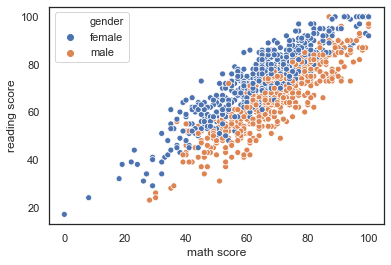

In [21]:
sns.set_style("white")
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df);

Our plot now uses a simple white background.

To experiment with the other `seaborn` themes, check out the [`seaborn` documentation](https://seaborn.pydata.org/tutorial/aesthetics.html).

`seaborn` also comes with several methods for controlling the *aesthetics* or visual elements of a plot. Again, to learn about the entire suite, check out [official `seaborn` docs](https://seaborn.pydata.org/tutorial.html). We will focus on one of the most common, the `.despine()` method. This will remove the upper and right-hand borders from the plot.

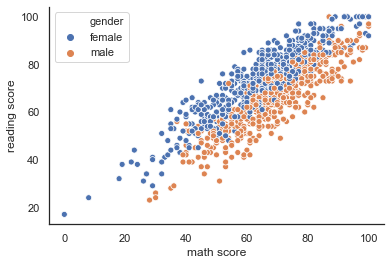

In [22]:
# Get rid of the box
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)
sns.despine();

Remember that all `seaborn` plots will be charted using the current theme until specified otherwise. Use `sns.set()` to restore default `seaborn` settings. 

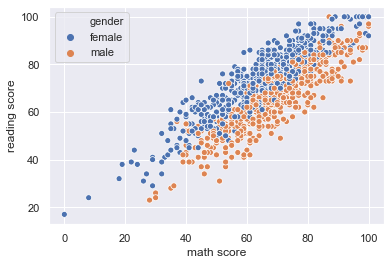

In [23]:
sns.set()
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df);

## Customizing `seaborn` plots with `matplotlib.pyplot`

At the beginning of this checkpoint we stated that `seaborn` is based on `matplotlib`. This means that we can include `matplotlib` functionalities directly with `seaborn` plots. Let's demonstrate with the `pyplot` series of functions from `matplotlib.pyplot`. The standard alias for this collection is `plt`.

Like `seaborn`, `matplotlib.pyplot` contains too many functions to cover here; for the complete list, check out [the documentation](https://matplotlib.org/users/pyplot_tutorial.html). 

Among the most common uses of `matplotlib.pyplot` with `seaborn` is to add custom axis labels and a plot title. This can be done with the methods `.xlabel()`, `.ylabel()` and `.title()`, respectively. Call `plt.show()` to print the results of the plot. These methods will be executed with our `seaborn` scatterplot and compiled onto one plot. 

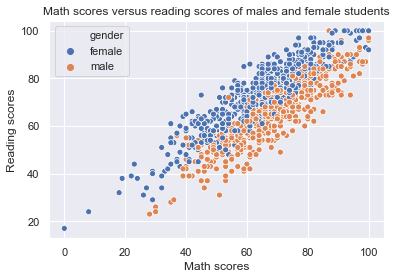

In [24]:
import matplotlib.pyplot as plt

# Custom labels
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)
plt.xlabel('Math scores')
plt.ylabel('Reading scores')
plt.title('Math scores versus reading scores of males and female students')
plt.show()

Our new plot is feeling a little cramped with the title. We can re-size the plot using the `figure()` method from `matplotlib.pyplot`. Call this method *before* making your `seaborn` plot. 

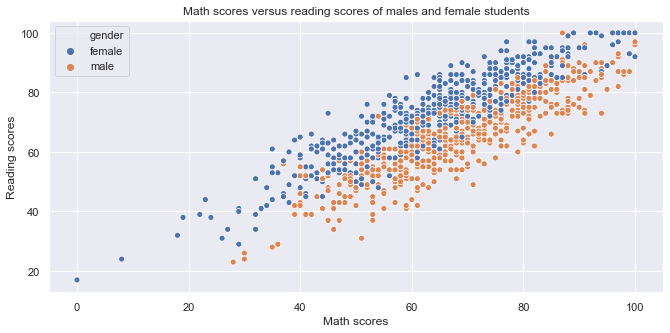

In [25]:
# Make a wider plot

plt.figure(figsize = (11,5))
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)
plt.xlabel('Math scores')
plt.ylabel('Reading scores')
plt.title('Math scores versus reading scores of males and female students')
plt.show()

This method can also be helpful for re-sizing plots where axis labels are hard to read.